# U-net training

#### **This script is deprecated and will be removed in future versions** now that the upstream project includes its own notebook for Unet training. Use [Train_Unet_model.ipynb](Train_Unet_model.ipynb) for new projects.

This notebook demonstrates U-net training using the same method as [Segment_every_grain.ipynb](Segment_every_grain.ipynb), but rearranged to work as a single script (using "Run All" in Jupyter).

As written, this script operates on the image and mask provided in the [examples/unet_training](examples/unet_training/) directory.

In [1]:
import segmenteverygrain as seg

2025-06-11 15:46:07.618957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749681967.630643  104345 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749681967.634231  104345 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-11 15:46:07.645887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


`input_dir` should contain "image" and "mask" in filenames.

In [2]:
# Patchify images and masks
input_dir = "examples/unet_training/Masks_and_images/"
# A directory called "Patches" will be created here
patch_dir = "examples/unet_training/new_project/"
image_dir, mask_dir = seg.patchify_training_data(input_dir, patch_dir)

  0%|          | 0/1 [00:00<?, ?it/s]2025-06-11 15:46:11.429498: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-06-11 15:46:11.461314: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552861696 exceeds 10% of free system memory.
100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


In [3]:
# Create training, validation, and test datasets
train_dataset, val_dataset, test_dataset = seg.create_train_val_test_data(
    image_dir, mask_dir, augmentation=True)

Epoch 1/100


2025-06-11 15:46:30.672563: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2025-06-11 15:46:31.450350: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


 1/14 ━━━━━━━━━━━━━━━━━━━━ 1:56 9s/step - accuracy: 0.8143 - loss: 0.9813

2025-06-11 15:46:35.133583: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


14/14 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.8360 - loss: 0.9300 - val_accuracy: 0.8497 - val_loss: 0.8999
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.8565 - loss: 0.8683 - val_accuracy: 0.8594 - val_loss: 0.9013
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.8879 - loss: 0.8533 - val_accuracy: 0.8753 - val_loss: 0.8587
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.8948 - loss: 0.8384 - val_accuracy: 0.8831 - val_loss: 0.8549
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.8992 - loss: 0.8356 - val_accuracy: 0.8831 - val_loss: 0.8646
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.9067 - loss: 0.8306 - val_accuracy: 0.8983 - val_loss: 0.8346
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.9102 - loss: 0.8268 - val_accuracy: 0.9007 - val_loss: 0.8342
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.9127 - loss: 0.8186 - val_accuracy: 0.9060 - val_loss: 0.8

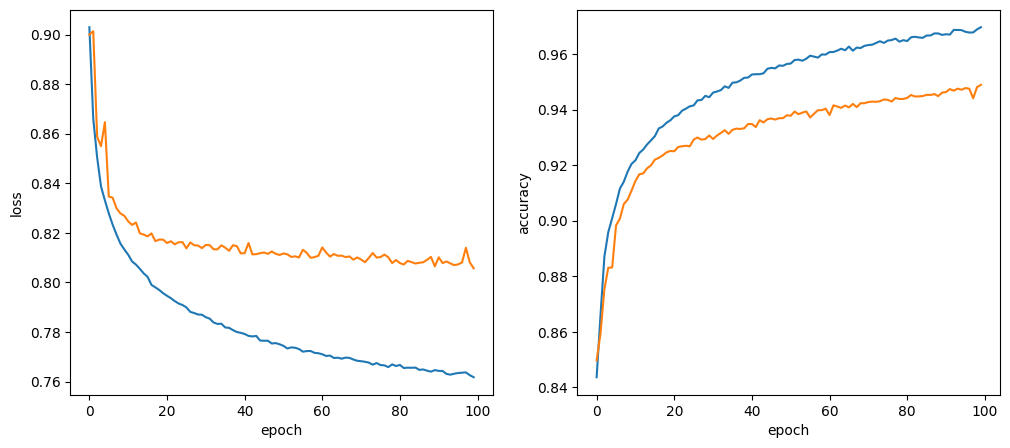

In [4]:
# Load base model weights and train the model with the new data
model = seg.create_and_train_model(
    train_dataset, val_dataset, test_dataset,
    model_file='models/seg_model.keras', epochs=100)

In [6]:
# Save finetuned model
model.save('examples/unet_training/new_model.keras')